# Does MODIS have data in the Caspian?

In [77]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.colors as mc
import matplotlib.colorbar as cb 

import xarray as xr
import numpy as np 

f = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/MODIS/aquaDay_errorGTE03K_04km_2018-01-01.tif'


def load_and_bound(f):

    MODIS_data = xr.open_dataarray(f,engine="rasterio")
    MODIS_data = MODIS_data.rename({'x':'longitude','y':'latitude'})

    
    #Apply a bounding box - definitley a better way to do this!
    #Upper limit
    space_filter = np.expand_dims(MODIS_data.latitude < 52,axis=(0,-1))
    mask = np.logical_and(np.isfinite(MODIS_data),space_filter) #make it a 2d mask
    MODIS_data_c = MODIS_data.where(mask,drop=True)


    #Lower limit
    space_filter = np.expand_dims(MODIS_data.latitude >35,axis=(0,-1))
    mask = np.logical_and(np.isfinite(MODIS_data),space_filter) #make it a 2d mask
    MODIS_data_c = MODIS_data_c.where(mask,drop=True)



    #Upper limit
    space_filter = np.expand_dims(MODIS_data.longitude < 55,axis=(0,1))
    mask = np.logical_and(np.isfinite(MODIS_data),space_filter) #make it a 2d mask
    MODIS_data_c = MODIS_data_c.where(mask,drop=True)


    # #Lower limit
    space_filter = np.expand_dims(MODIS_data.longitude >44,axis=(0,1))
    mask = np.logical_and(np.isfinite(MODIS_data),space_filter) #make it a 2d mask
    MODIS_data_c = MODIS_data_c.where(mask,drop=True)

    ds = MODIS_data.to_dataset()
    
    return ds

def plot_caspian(ds):
    fig = plt.figure(figsize=[30,20])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

    ds['band_data'].plot(ax=ax, 
                     cmap='jet',
                     transform=ccrs.PlateCarree())
    ax.coastlines()


    plt.show()

In [74]:
ds = load_and_bound(f)

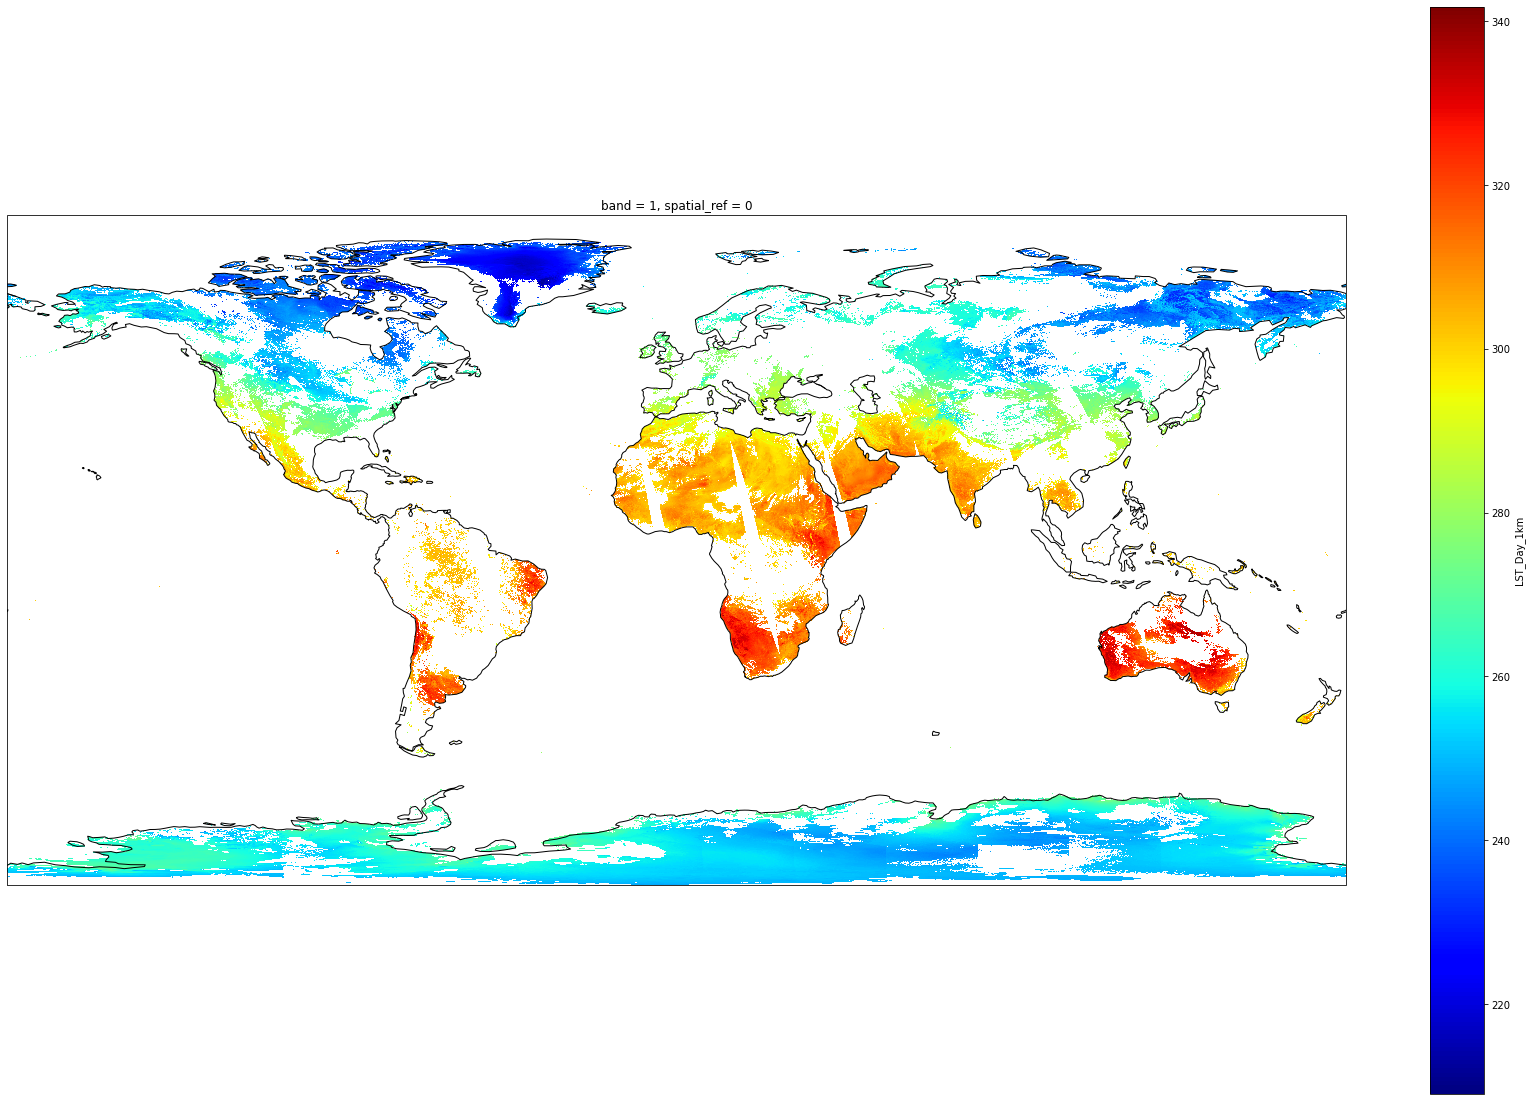

In [78]:
plot_caspian(ds)

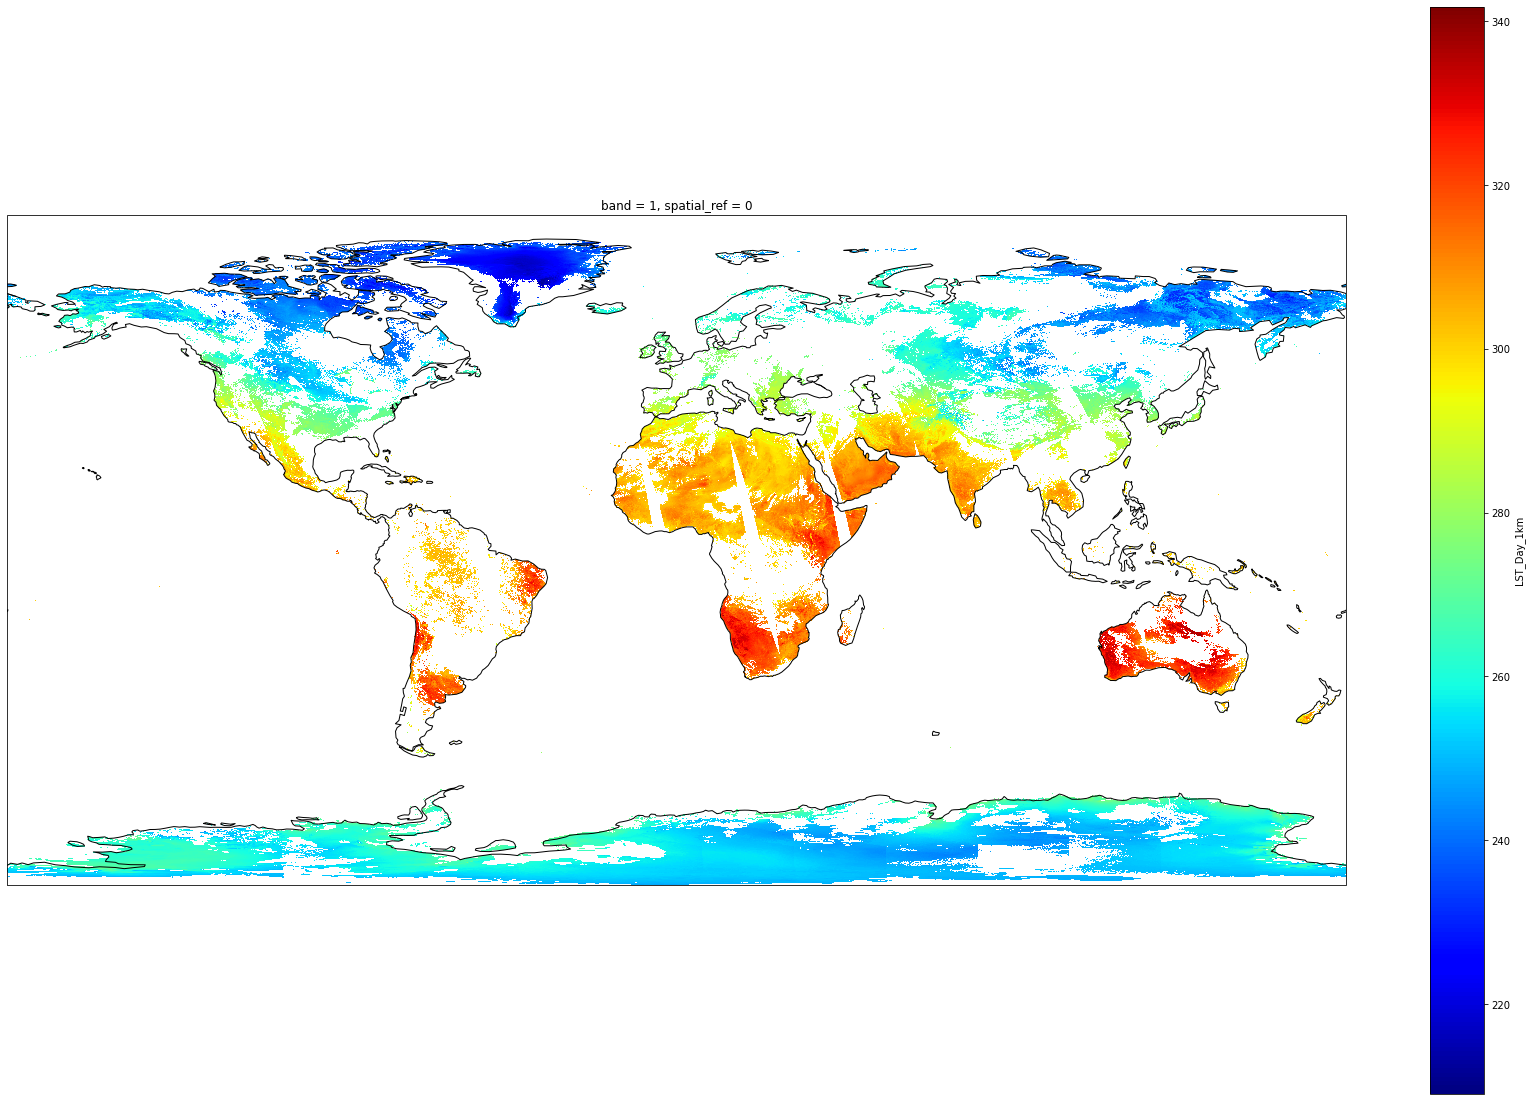

In [70]:
ds = MODIS_data.to_dataset()
fig = plt.figure(figsize=[30,20])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

ds['band_data'].plot(ax=ax, 
                     cmap='jet',
                     transform=ccrs.PlateCarree())
ax.coastlines()


plt.show()

In [66]:
MODIS_data.latitude.max()

<xarray.DataArray 'latitude' ()>
array(45.88333333)
Coordinates:
    spatial_ref  int64 0

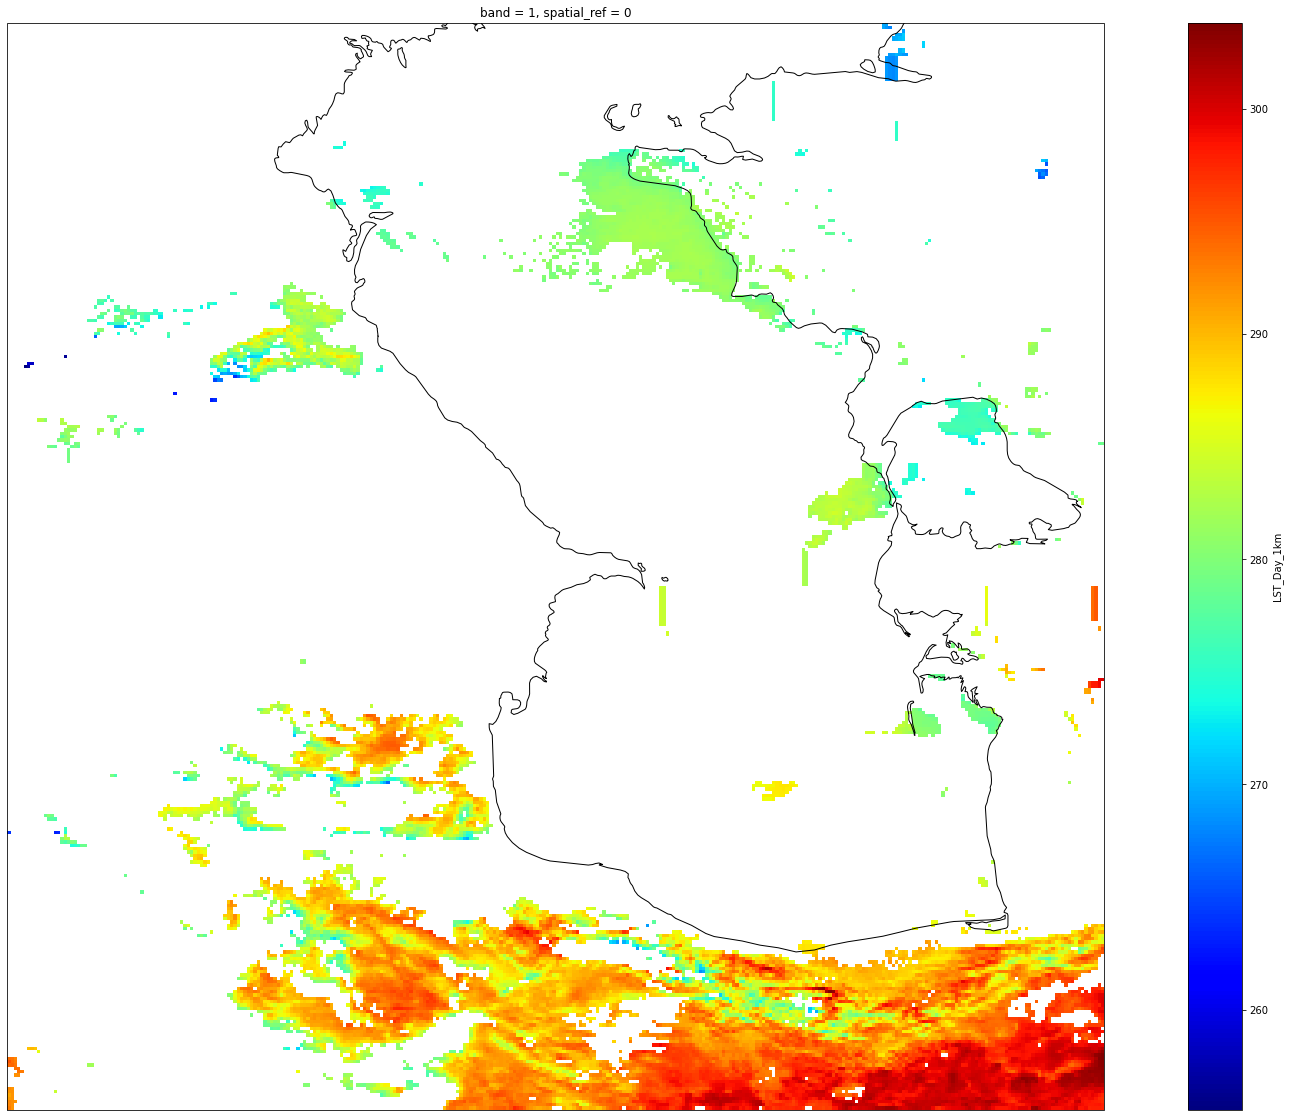

In [64]:
fig = plt.figure(figsize=[30,20])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

ds['band_data'].plot(ax=ax, 
                     cmap='jet',
                     transform=ccrs.PlateCarree())
ax.coastlines()


plt.show()

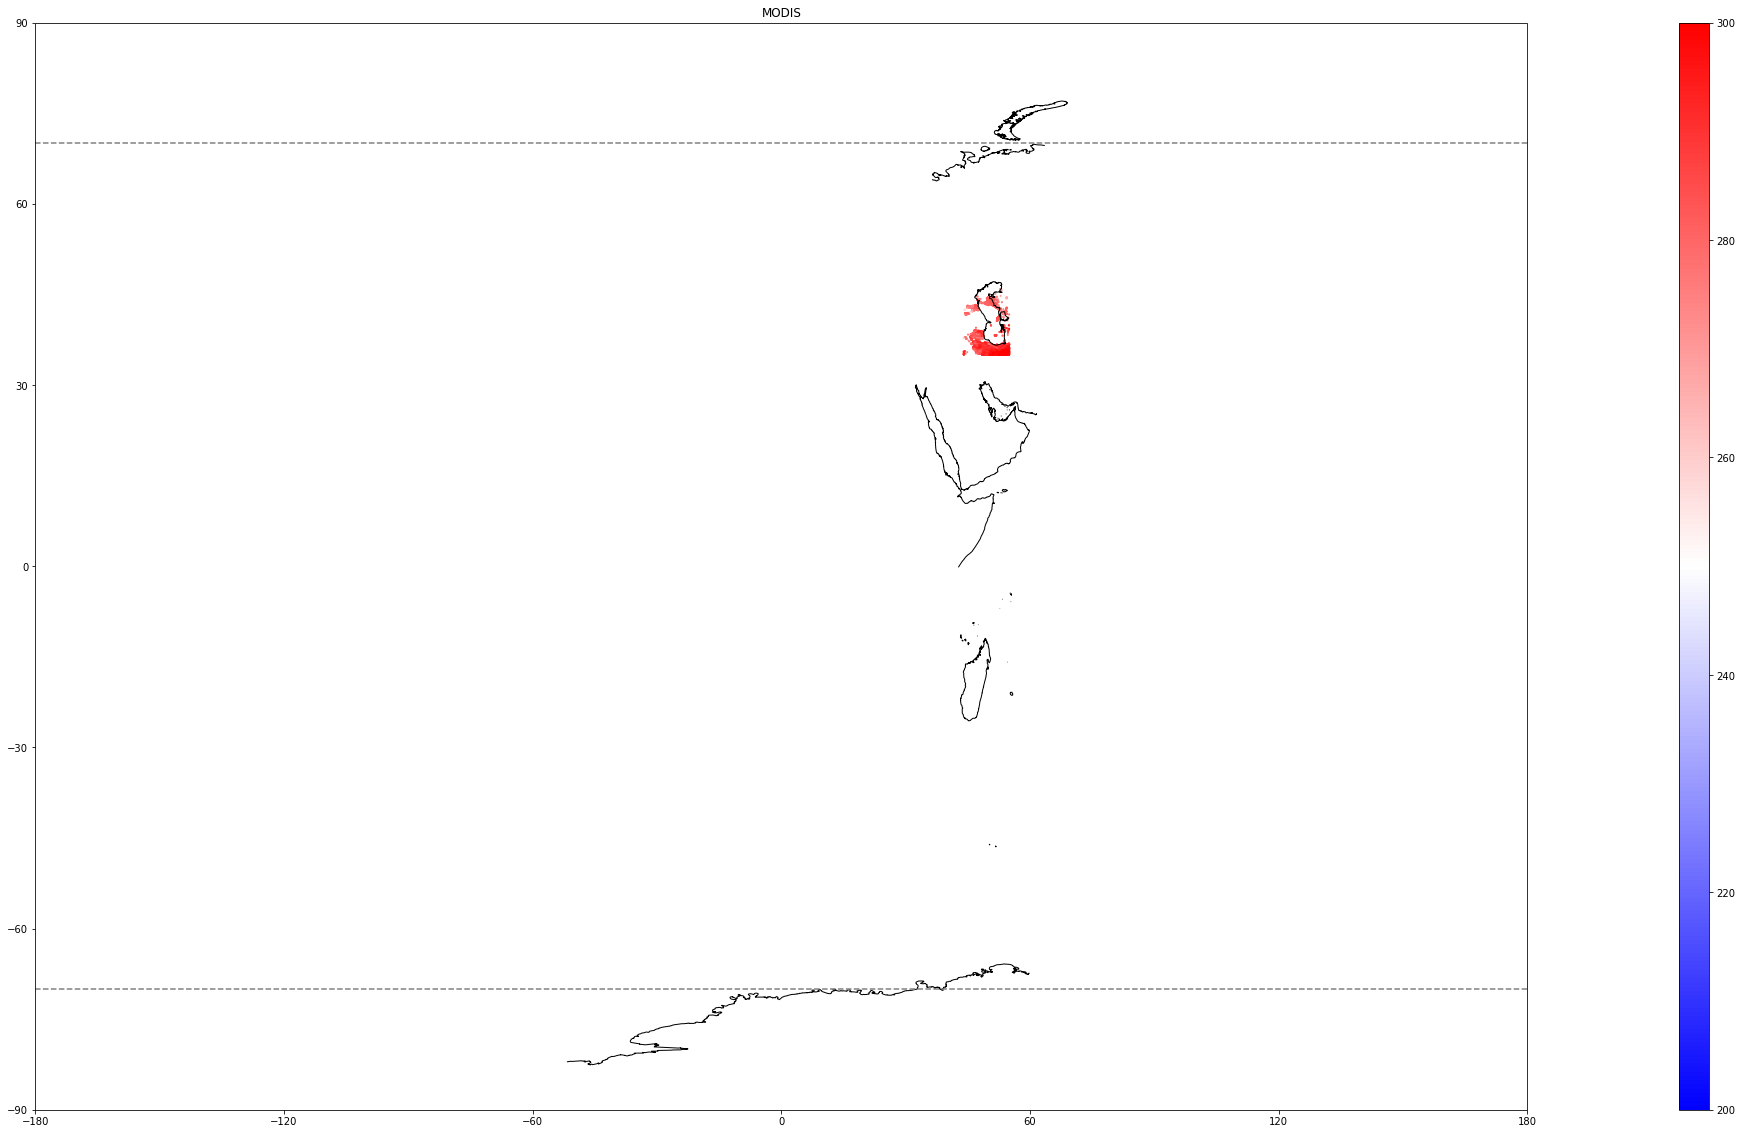

In [63]:
MODIS_df = MODIS_data.to_dataframe().dropna().reset_index()
plot_map(MODIS_df,'band_data',vmin=200,vmax=300,cmap=plt.cm.bwr,logscale=False,title='MODIS')
